In [141]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sn
import matplotlib.pyplot as plt

In [195]:
df = pd.read_csv('test_sample_csv')

In [196]:
df.head()

,noise_db,machine_type,model_id,sound,sound_path,target,spect_mean,spect_min,spect_max,spect_std,...,zero_crossing_rate_max,zero_crossing_rate_std,d_harmonic_mean,d_harmonic_min,d_harmonic_max,d_harmonic_std,d_percussive_mean,d_percussive_min,d_percussive_max,d_percussive_std
0,-6,slider,6,00000325.wav,assets/sounds/-6_dB_slider/id_06/normal/000003...,normal,0.086186,1.850374e-10,8.282417,0.239661,...,0.183105,0.019458,0.051047,3.093022e-13,8.259317,0.196500,0.035139,8.307444e-11,3.125634,0.079335
1,0,pump,0,00000814.wav,assets/sounds/0_dB_pump/id_00/normal/00000814.wav,normal,0.064292,9.486077e-11,4.943036,0.152599,...,0.103516,0.011921,0.033057,1.974081e-13,2.383167,0.098131,0.031234,3.159423e-11,2.559869,0.068802
2,6,valve,0,00000928.wav,assets/sounds/6_dB_valve/id_00/normal/00000928...,normal,0.028409,6.772467e-11,1.246882,0.074859,...,0.242188,0.035117,0.012415,7.563213e-14,0.953090,0.039711,0.015994,4.018324e-11,1.243116,0.048474
3,-6,pump,6,00000043.wav,assets/sounds/-6_dB_pump/id_06/normal/00000043...,normal,0.099990,1.298539e-10,4.971423,0.284035,...,0.073730,0.005807,0.055119,5.787144e-14,4.255203,0.183855,0.044872,4.671323e-11,2.199901,0.119220
4,-6,pump,2,00000420.wav,assets/sounds/-6_dB_pump/id_02/normal/00000420...,normal,0.094911,6.309869e-11,4.607907,0.261325,...,0.075684,0.006278,0.052051,9.006482e-14,4.094114,0.171043,0.042860,4.865160e-11,2.621902,0.111749


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2703 entries, 0 to 2702
Data columns (total 70 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   noise_db                 2703 non-null   int64  
 1   machine_type             2703 non-null   object 
 2   model_id                 2703 non-null   int64  
 3   sound                    2703 non-null   object 
 4   sound_path               2703 non-null   object 
 5   target                   2703 non-null   object 
 6   spect_mean               2703 non-null   float64
 7   spect_min                2703 non-null   float64
 8   spect_max                2703 non-null   float64
 9   spect_std                2703 non-null   float64
 10  mel_spect_mean           2703 non-null   float64
 11  mel_spect_min            2703 non-null   float64
 12  mel_spect_max            2703 non-null   float64
 13  mel_spect_std            2703 non-null   float64
 14  chroma_mean             

In [198]:
df.shape

(2703, 70)

In [199]:
df_test = df.iloc[:,5:df.shape[1]]

In [200]:
df_test.shape[1]

65

In [201]:
df_test.head()

,target,spect_mean,spect_min,spect_max,spect_std,mel_spect_mean,mel_spect_min,mel_spect_max,mel_spect_std,chroma_mean,...,zero_crossing_rate_max,zero_crossing_rate_std,d_harmonic_mean,d_harmonic_min,d_harmonic_max,d_harmonic_std,d_percussive_mean,d_percussive_min,d_percussive_max,d_percussive_std
0,normal,0.086186,1.850374e-10,8.282417,0.239661,0.019379,8.581393e-17,2.786268,0.078743,0.505052,...,0.183105,0.019458,0.051047,3.093022e-13,8.259317,0.196500,0.035139,8.307444e-11,3.125634,0.079335
1,normal,0.064292,9.486077e-11,4.943036,0.152599,0.008011,4.531395e-17,1.582137,0.023850,0.788932,...,0.103516,0.011921,0.033057,1.974081e-13,2.383167,0.098131,0.031234,3.159423e-11,2.559869,0.068802
2,normal,0.028409,6.772467e-11,1.246882,0.074859,0.001583,7.011302e-18,0.075360,0.004580,0.783146,...,0.242188,0.035117,0.012415,7.563213e-14,0.953090,0.039711,0.015994,4.018324e-11,1.243116,0.048474
3,normal,0.099990,1.298539e-10,4.971423,0.284035,0.027485,1.376388e-16,1.310772,0.076738,0.785040,...,0.073730,0.005807,0.055119,5.787144e-14,4.255203,0.183855,0.044872,4.671323e-11,2.199901,0.119220
4,normal,0.094911,6.309869e-11,4.607907,0.261325,0.022943,1.127883e-16,1.023681,0.067418,0.792248,...,0.075684,0.006278,0.052051,9.006482e-14,4.094114,0.171043,0.042860,4.865160e-11,2.621902,0.111749


In [202]:
df_test["target"].replace({"abnormal": "1", "normal": "0"}, inplace=True)

In [203]:
df_test = df_test.astype({"target": int})

In [205]:
df_sub = df_test.drop('target', 1)

In [184]:
y = df_test['target']
df_test = df_test.drop('target', 1)

In [112]:
# Correlation matrix
df_test.corr().style.background_gradient(cmap="coolwarm")

/home/ms/anaconda3/lib/python3.7/site-packages/pandas/io/formats/style.py:1264: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/home/ms/anaconda3/lib/python3.7/site-packages/pandas/io/formats/style.py:1265: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,spect_mean,spect_min,spect_max,spect_std,mel_spect_mean,mel_spect_min,mel_spect_max,mel_spect_std,chroma_mean,chroma_min,chroma_max,chroma_std,chroma_cq_mean,chroma_cq_min,chroma_cq_max,chroma_cq_std,chroma_cens_mean,chroma_cens_min,chroma_cens_max,chroma_cens_std,mfcc_mean,mfcc_min,mfcc_max,mfcc_std,rms_mean,rms_min,rms_max,rms_std,cent_mean,cent_min,cent_max,cent_std,spec_bw_mean,spec_bw_min,spec_bw_max,spec_bw_std,contrast_mean,contrast_min,contrast_max,contrast_std,flatness_mean,flatness_min,flatness_max,flatness_std,roll_off_mean,roll_off_min,roll_off_max,roll_off_std,tonnetz_mean,tonnetz_min,tonnetz_max,tonnetz_std,zero_crossing_rate_mean,zero_crossing_rate_min,zero_crossing_rate_max,zero_crossing_rate_std,d_harmonic_mean,d_harmonic_min,d_harmonic_max
spect_mean,1.000000,0.388537,0.568976,0.844726,0.835251,0.855097,0.431885,0.639501,0.170933,0.290127,nan,-0.269600,0.195100,0.248424,nan,-0.277037,0.226854,0.254469,-0.204748,-0.246634,0.639941,0.880593,-0.066748,-0.924649,0.879659,0.863245,0.636277,0.348164,0.143895,0.218444,-0.168429,-0.251070,0.085393,0.183498,-0.141960,-0.187666,-0.121776,-0.113565,-0.092359,0.184599,-0.094307,-0.000401,0.100159,0.048344,0.109950,0.187355,-0.104625,-0.181816,-0.045657,0.128960,-0.187312,-0.226600,0.179706,0.217199,-0.119373,-0.207396,0.976422,0.315024,0.538301
spect_min,0.388537,1.000000,0.305960,0.430358,0.419539,0.419899,0.219592,0.361992,0.011076,0.075876,nan,-0.053129,-0.032675,-0.009201,nan,0.006569,-0.014947,0.005097,-0.010296,0.019710,0.335810,0.345037,0.054164,-0.333589,0.435003,0.423150,0.291853,0.152133,-0.095637,-0.029924,-0.141212,-0.141643,-0.089863,-0.021597,-0.093572,-0.073471,-0.030279,0.023532,-0.103583,-0.083619,-0.199179,-0.112809,-0.083453,-0.121499,-0.081520,-0.027261,-0.103031,-0.053988,-0.051122,-0.023867,-0.045371,-0.005830,-0.083847,-0.037235,-0.166018,-0.167217,0.399679,0.176444,0.314168
spect_max,0.568976,0.305960,1.000000,0.766913,0.770216,0.576523,0.868683,0.900965,-0.037516,-0.057790,nan,0.037963,-0.150689,-0.226047,nan,0.186283,-0.117319,-0.151121,0.165921,0.122164,0.526388,0.426643,0.043765,-0.509703,0.732027,0.566987,0.844784,0.729880,-0.214090,-0.230837,-0.194872,-0.113940,-0.116384,-0.135616,-0.081013,-0.014206,-0.012084,0.004704,-0.157731,-0.172021,-0.385536,-0.419796,-0.174439,-0.216130,-0.119842,-0.138703,-0.091584,0.016909,0.107920,-0.104992,0.192581,0.149947,-0.250690,-0.242616,-0.240859,-0.158772,0.592509,0.235196,0.928494
spect_std,0.844726,0.430358,0.766913,1.000000,0.984429,0.909690,0.548727,0.890382,-0.001090,0.132627,nan,-0.083345,-0.098179,-0.049183,nan,0.025699,-0.069178,-0.035191,0.035079,0.066324,0.720291,0.706096,0.162602,-0.708956,0.995758,0.918494,0.726836,0.457111,-0.274763,-0.168060,-0.345948,-0.283912,-0.228187,-0.110147,-0.244361,-0.155805,-0.059893,0.059455,-0.294447,-0.242846,-0.498283,-0.369503,-0.198401,-0.270377,-0.211408,-0.114125,-0.246195,-0.108702,-0.016351,-0.034082,-0.010826,0.045910,-0.263599,-0.181941,-0.377141,-0.319335,0.877243,0.327875,0.776357
mel_spect_mean,0.835251,0.419539,0.770216,0.984429,1.000000,0.911132,0.586373,0.908583,0.028960,0.142345,nan,-0.104899,-0.065375,-0.026753,nan,0.002867,-0.040070,-0.018288,0.006381,0.037059,0.692190,0.678309,0.167732,-0.682944,0.977798,0.897040,0.751423,0.490069,-0.261460,-0.165201,-0.317529,-0.258605,-0.215879,-0.113154,-0.225838,-0.140807,-0.088458,0.042284,-0.275116,-0.220493,-0.455524,-0.344998,-0.183969,-0.247149,-0.200158,-0.114348,-0.227122,-0.096056,-0.000306,-0.006756,-0.017370,0.016384,-0.250957,-0.175386,-0.345446,-0.291085,0.858602,0.315856,0.764457
mel_spect_min,0.855097,0.419899,0.576523,0.909690,0.911132,1.000000,0.387300,0.725617,0.029075,0.198572,nan,-0.152651,0.004914,0.099622,nan,-0.121647,0.013535,0.068765,-0.093800,-0.023058,0.657644,0.784195,0.093107,-0.726313,0.927889,0.965286,0.586319,0.200616,-0.173888,-0.006044,-0.327781,-0.340999,-0.164207,0.021775,-0.262709,-0.250152,-0.079730,0.029642,-0.269181,-0.127340,-0.373309,-0.207765,-0.125126,-0.190985,-

In [161]:
# Split dataframe into random train and test subsets

X_train, X_test, Y_train, Y_test = train_test_split(
    df_test,
    y,
    test_size=0.1,
    random_state=200
)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(2432, 64) (2432,)
(271, 64) (271,)


In [162]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state = 50, n_estimators = 100,
                                    criterion = 'gini')

In [163]:
from sklearn.model_selection import cross_val_score
# 10-Fold Cross validation
print(np.mean(cross_val_score(random_forest, X_train, Y_train, cv=10)))

0.8671743236861633


In [164]:
random_forest.fit(X_train, Y_train)

RandomForestClassifier(random_state=50)

In [165]:
acc_random_forest = round(random_forest.score(X_test, Y_test) * 100, 2)
acc_random_forest

90.41

In [166]:
y_pred = random_forest.predict(X_test)

In [167]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.94       222
           1       0.96      0.49      0.65        49

    accuracy                           0.90       271
   macro avg       0.93      0.74      0.80       271
weighted avg       0.91      0.90      0.89       271



Feature ranking:
1. feature 27 (0.037357)
2. feature 26 (0.034933)
3. feature 63 (0.027465)
4. feature 62 (0.027274)
5. feature 7 (0.027267)
6. feature 4 (0.025292)
7. feature 51 (0.024249)
8. feature 55 (0.023778)
9. feature 3 (0.023676)
10. feature 31 (0.021990)
11. feature 59 (0.021372)
12. feature 24 (0.021138)
13. feature 9 (0.020334)
14. feature 12 (0.019902)
15. feature 11 (0.019846)
16. feature 0 (0.019522)
17. feature 20 (0.019183)
18. feature 48 (0.019155)
19. feature 35 (0.019114)
20. feature 50 (0.018674)
21. feature 30 (0.018422)
22. feature 49 (0.018003)
23. feature 8 (0.017762)
24. feature 60 (0.017393)
25. feature 47 (0.017143)
26. feature 54 (0.017059)
27. feature 38 (0.016972)
28. feature 34 (0.016654)
29. feature 56 (0.015968)
30. feature 52 (0.015738)
31. feature 46 (0.015423)
32. feature 15 (0.015328)
33. feature 25 (0.015269)
34. feature 2 (0.015109)
35. feature 16 (0.014521)
36. feature 6 (0.014520)
37. feature 40 (0.014442)
38. feature 36 (0.014382)
39. feature 

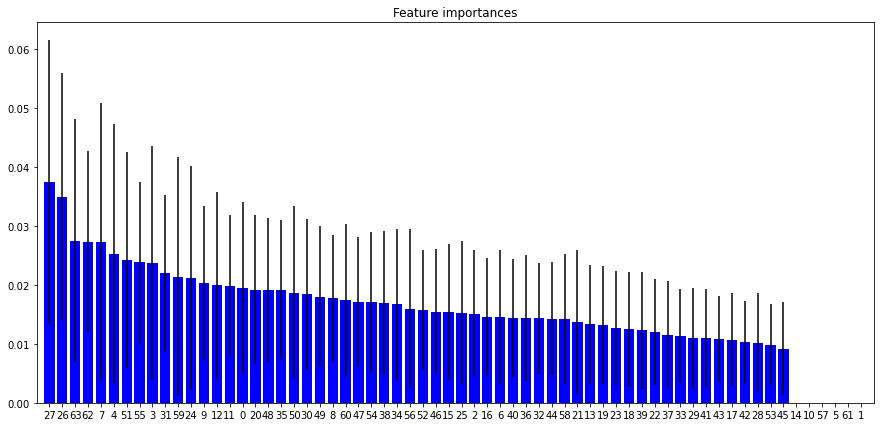

In [168]:
importances = random_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(15, 7))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="b", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()